In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
print("\n" + "="*60)
print("LOADING DATA")
print("="*60)

TICKER = 'AAPL'
data = pd.read_csv(f'../data/{TICKER}_featured_data.csv', index_col=0, parse_dates=True)

print(f"\n Loaded {len(data)} samples")
print(f" Features: {data.shape[1] - 1}")
print(f" Target: 1 (next day's price)")

print("\n Data preview:")
print(data.head())


LOADING DATA

 Loaded 980 samples
 Features: 10
 Target: 1 (next day's price)

 Data preview:
            Close_Lag_1        MA_7       MA_30  Price_Change  Volume_Change  \
Date                                                                           
2022-02-14   165.385452  168.792707  167.385816      0.142342     -12.653402   
2022-02-15   165.620865  168.848751  167.091986      2.315248     -27.450209   
2022-02-16   169.455399  168.973439  166.865727     -0.138905      -2.159053   
2022-02-17   169.220016  168.139845  166.675555     -2.126907      13.750012   
2022-02-18   165.620865  166.881744  166.529067     -0.935589      18.944579   

            Daily_Volatility  Volume_Ratio  Price_Momentum_3     ATR_7  \
Date                                                                     
2022-02-14          2.961723      1.037392         -4.197856  3.373617   
2022-02-15          2.647891      0.779345          0.389293  3.272743   
2022-02-16          3.226501      0.784985      

In [3]:
print("\n" + "="*60)
print("PREPARING DATA")
print("="*60)

# Separate features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

print(f"\n Features (X): {X.shape}")
print(f" Target (y): {y.shape}")

print("\n Feature names:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i}. {col}")


PREPARING DATA

 Features (X): (980, 10)
 Target (y): (980,)

 Feature names:
   1. Close_Lag_1
   2. MA_7
   3. MA_30
   4. Price_Change
   5. Volume_Change
   6. Daily_Volatility
   7. Volume_Ratio
   8. Price_Momentum_3
   9. ATR_7
   10. Gap_Percent


In [4]:
print("\n" + "="*60)
print("SPLITTING DATA")
print("="*60)

print("""
💡 Important: For time series, we split by time, not randomly!
   - Training set: Older data (80%)
   - Testing set: Recent data (20%)
""")

# Calculate split point
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

# Split data
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print(f"\nData split:")
print(f"   Training set: {len(X_train)} samples ({split_ratio*100:.0f}%)")
print(f"   Testing set: {len(X_test)} samples ({(1-split_ratio)*100:.0f}%)")

print(f"\nTraining period: {str(X_train.index[0])[:10]} to {str(X_train.index[-1])[:10]}")
print(f"Testing period: {str(X_test.index[0])[:10]} to {str(X_test.index[-1])[:10]}")



SPLITTING DATA

💡 Important: For time series, we split by time, not randomly!
   - Training set: Older data (80%)
   - Testing set: Recent data (20%)


Data split:
   Training set: 784 samples (80%)
   Testing set: 196 samples (20%)

Training period: 2022-02-14 to 2025-03-31
Testing period: 2025-04-01 to 2026-01-09


In [7]:
print("\n" + "="*60)
print("TRAINING LINEAR REGRESSION MODEL")
print("="*60)
# Create and train model
model = LinearRegression()

print("\n Training model...")
model.fit(X_train, y_train)

print(" Model trained!")

# Make predictions
print("\n Making predictions...")
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(" Predictions complete!")


TRAINING LINEAR REGRESSION MODEL

 Training model...
 Model trained!

 Making predictions...
 Predictions complete!


In [8]:
print("\n" + "="*60)
print("EVALUATING MODEL")
print("="*60)

# Calculate metrics for training set
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate metrics for testing set
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("\n Training Set Performance:")
print(f"   RMSE: ${train_rmse:.2f}")
print(f"   MAE:  ${train_mae:.2f}")
print(f"   R²:   {train_r2:.4f}")

print("\n Testing Set Performance:")
print(f"   RMSE: ${test_rmse:.2f}")
print(f"   MAE:  ${test_mae:.2f}")
print(f"   R²:   {test_r2:.4f}")


EVALUATING MODEL

 Training Set Performance:
   RMSE: $3.01
   MAE:  $2.26
   R²:   0.9914

 Testing Set Performance:
   RMSE: $4.77
   MAE:  $3.02
   R²:   0.9747



VISUALIZING RESULTS


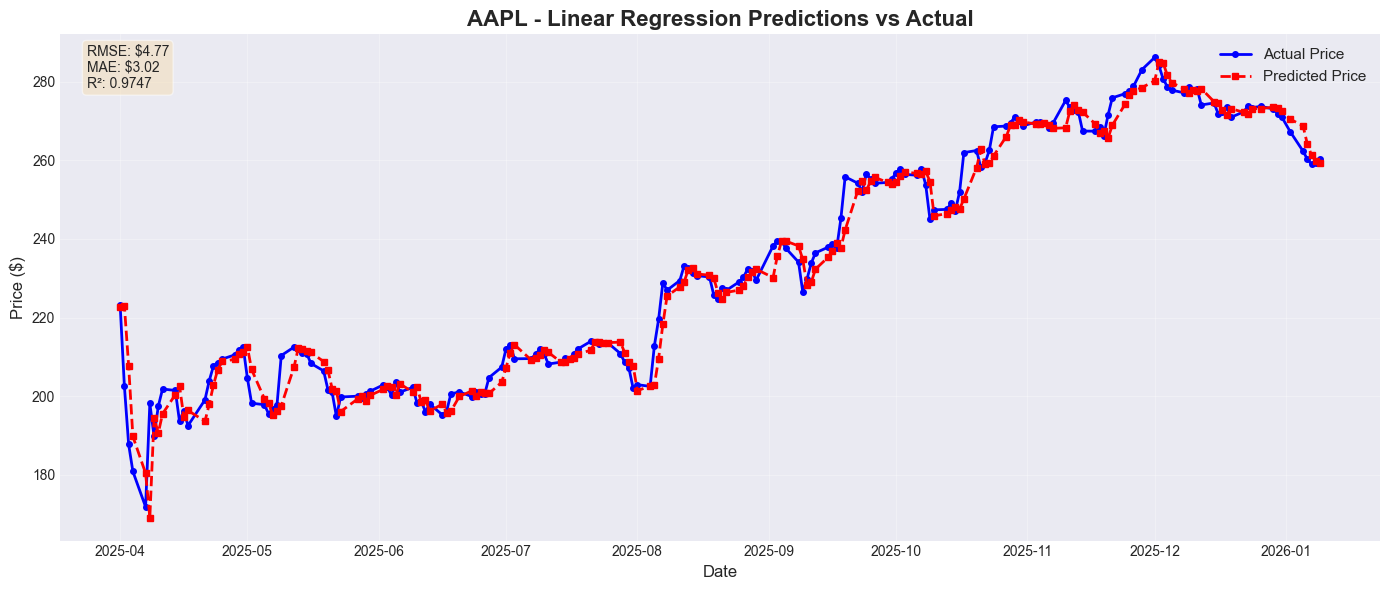

Predictions chart created!


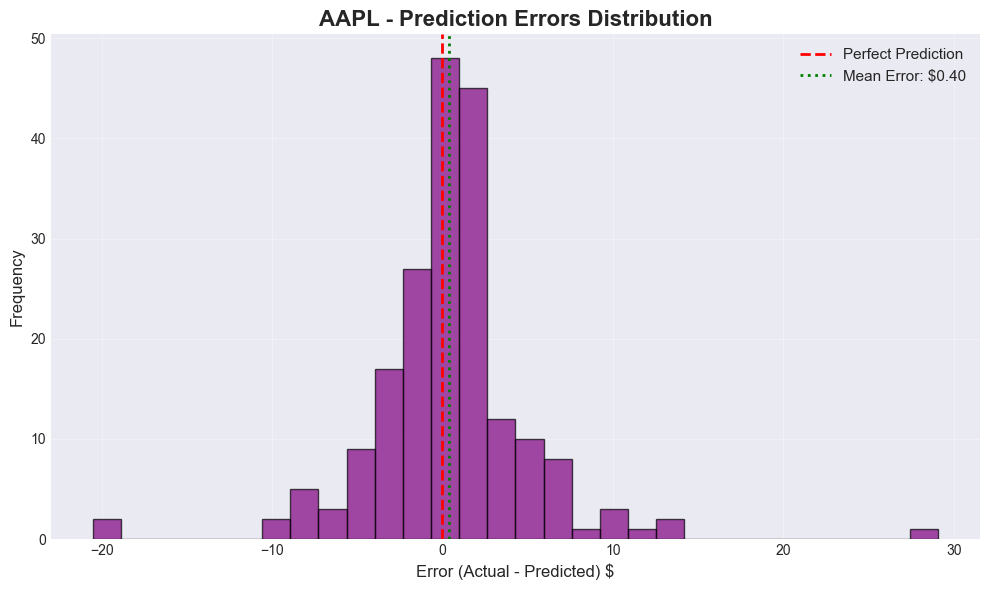

 Error distribution chart created!

 Error Analysis:
   Mean Error: $0.40
   Std Error: $4.75
   Max Overestimate: $-20.50
   Max Underestimate: $29.07


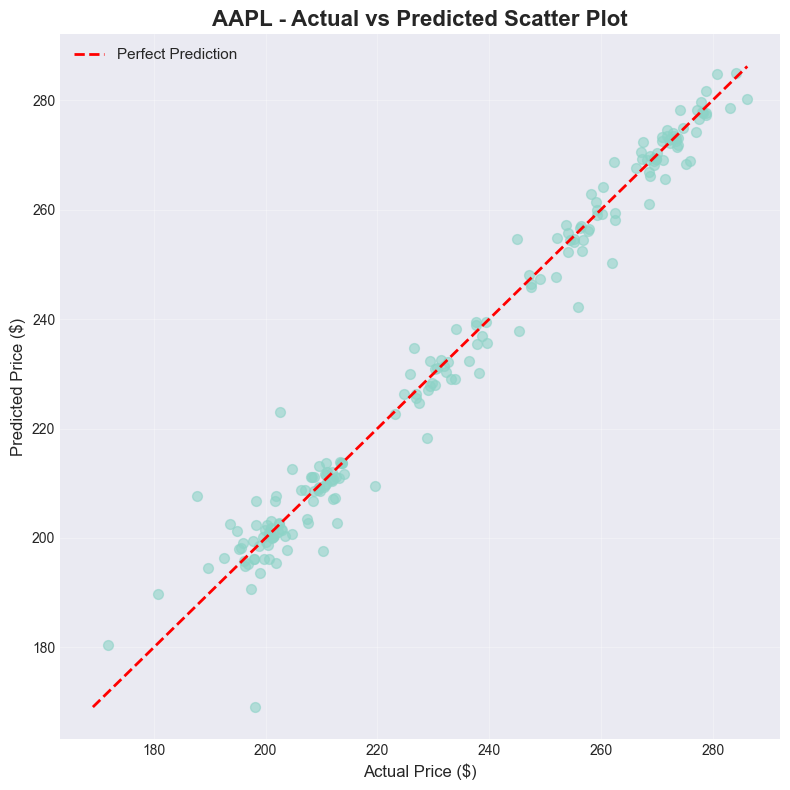

 Scatter plot created!


In [9]:
print("\n" + "="*60)
print("VISUALIZING RESULTS")
print("="*60)

# Plot 1: Actual vs Predicted Prices
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price',
         linewidth=2, marker='o', markersize=4, color='blue')
plt.plot(y_test.index, test_predictions, label='Predicted Price',
         linewidth=2, linestyle='--', marker='s', markersize=4, color='red')
plt.title(f'{TICKER} - Linear Regression Predictions vs Actual',
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add metrics box
textstr = f'RMSE: ${test_rmse:.2f}\nMAE: ${test_mae:.2f}\nR²: {test_r2:.4f}'
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(f'../data/{TICKER}_predictions.png', dpi=300)
plt.show()

print("Predictions chart created!")

# Plot 2: Prediction Errors Distribution
errors = y_test.values - test_predictions

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Error (Actual - Predicted) $', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'{TICKER} - Prediction Errors Distribution', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add mean error line
mean_error = np.mean(errors)
plt.axvline(x=mean_error, color='green', linestyle=':', linewidth=2,
            label=f'Mean Error: ${mean_error:.2f}')
plt.legend(fontsize=11)

plt.tight_layout()
plt.savefig(f'../data/{TICKER}_errors.png', dpi=300)
plt.show()

print(" Error distribution chart created!")

print(f"\n Error Analysis:")
print(f"   Mean Error: ${np.mean(errors):.2f}")
print(f"   Std Error: ${np.std(errors):.2f}")
print(f"   Max Overestimate: ${np.min(errors):.2f}")
print(f"   Max Underestimate: ${np.max(errors):.2f}")

# Plot 3: Scatter Plot (Actual vs Predicted)
plt.figure(figsize=(8, 8))
plt.scatter(y_test.values, test_predictions, alpha=0.6, s=50)

# Add perfect prediction line
min_val = min(y_test.min(), test_predictions.min())
max_val = max(y_test.max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2,
         label='Perfect Prediction')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title(f'{TICKER} - Actual vs Predicted Scatter Plot', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'../data/{TICKER}_scatter.png', dpi=300)
plt.show()

print(" Scatter plot created!")


FEATURE IMPORTANCE

 Feature Importance (by coefficient):
            Feature  Coefficient  Abs_Coefficient
3      Price_Change     1.847952         1.847952
0       Close_Lag_1     1.060555         1.060555
6      Volume_Ratio     0.905073         0.905073
5  Daily_Volatility    -0.201247         0.201247
9       Gap_Percent    -0.137479         0.137479
7  Price_Momentum_3    -0.087519         0.087519
1              MA_7    -0.078798         0.078798
8             ATR_7     0.064720         0.064720
2             MA_30     0.017478         0.017478
4     Volume_Change    -0.006242         0.006242


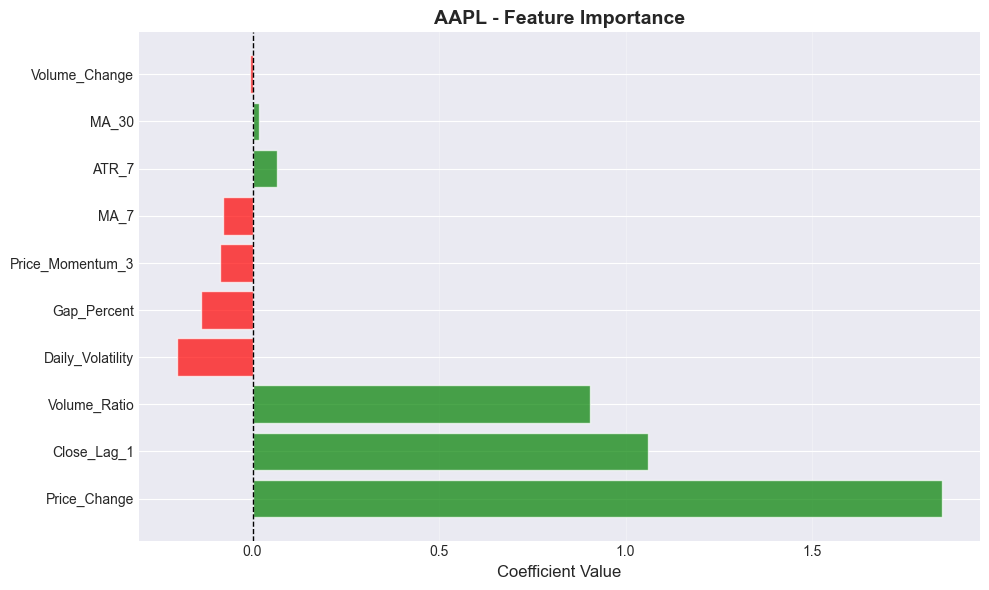

 Feature importance chart created!


In [10]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

# Get feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\n Feature Importance (by coefficient):")
print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(range(len(feature_importance)), feature_importance['Coefficient'],
         color=colors, alpha=0.7)
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title(f'{TICKER} - Feature Importance', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(f'../data/{TICKER}_feature_importance.png', dpi=300)
plt.show()

print(" Feature importance chart created!")

In [11]:
print("\n" + "="*60)
print("PREDICTING TOMORROW'S PRICE")
print("="*60)

# Use the last row of features to predict tomorrow
last_features = X.iloc[-1:].values
tomorrow_prediction = model.predict(last_features)[0]

# Get today's actual price (last known price)
current_price = y.iloc[-1]

print(f"\n💰 Current Price (today): ${current_price:.2f}")
print(f" Predicted Price (tomorrow): ${tomorrow_prediction:.2f}")
print(f" Expected Change: ${tomorrow_prediction - current_price:.2f} ({((tomorrow_prediction/current_price - 1)*100):.2f}%)")

if tomorrow_prediction > current_price:
    print(" Prediction: Price will INCREASE")
else:
    print(" Prediction: Price will DECREASE")


PREDICTING TOMORROW'S PRICE

💰 Current Price (today): $260.25
 Predicted Price (tomorrow): $259.30
 Expected Change: $-0.95 (-0.37%)
 Prediction: Price will DECREASE


In [13]:
# Save predictions to CSV
results = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test.values,
    'Predicted': test_predictions,
    'Error': y_test.values - test_predictions,
    'Abs_Error': abs(y_test.values - test_predictions)
})

results_file = f'../data/{TICKER}_predictions_results.csv'
results.to_csv(results_file, index=False)

# Save model metrics
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²'],
    'Training': [train_rmse, train_mae, train_r2],
    'Testing': [test_rmse, test_mae, test_r2]
})

metrics_file = f'../data/{TICKER}_model_metrics.csv'
metrics_df.to_csv(metrics_file, index=False)
print(f" Model metrics saved to: {metrics_file}")

 Model metrics saved to: ../data/AAPL_model_metrics.csv
